In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

site Number_atom1
0.04893241777906289
site Number_atom2
-0.026603391726670093
site AtomicWeight_diff
0.054821669274762695
site AtomicWeight_atom1
0.04606205853092892
site AtomicWeight_atom2
-0.02417269535746134
site Row_atom1
0.11097639402099604
site Row_atom2
-0.03158458082025928
site Column_atom1
-0.16611675194863015
site Column_atom2
0.03255704159399342
site Electronegativity_diff
-0.17592905664900688
site Electronegativity_atom1
-0.16050077271632665
site Electronegativity_atom2
0.03809919875226376
site CovalentRadius_atom1
0.16587356520566082
site CovalentRadius_atom2
-0.025342626792402435
AGNI eta=8.00e-01_atom1
-0.16902884347305866
AGNI eta=8.00e-01_atom2
-0.2042541189047118
AGNI eta=1.23e+00_atom1
-0.21048729278374664
AGNI eta=1.23e+00_atom2
-0.30409167100935797
AGNI eta=1.88e+00_atom1
-0.30690208906306116
AGNI eta=1.88e+00_atom2
-0.3998738886617549
AGNI eta=2.89e+00_atom1
-0.44910127418433016
AGNI eta=2.89e+00_atom2
-0.4545797974398452
AGNI eta=4.43e+00_atom1
-0.484775517750288

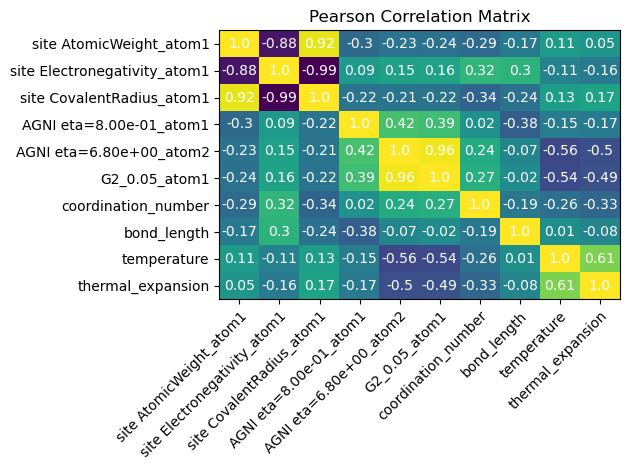

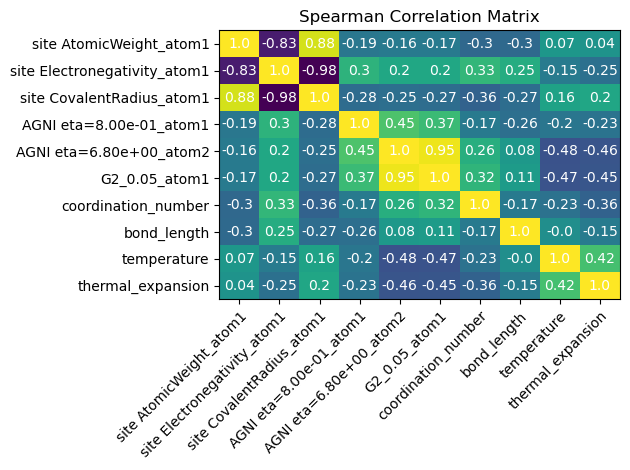

In [15]:
labels_df = pd.read_csv("labels/volume_cubic_labels.csv.csv")
labels_df = labels_df.set_index("phase_id")
features_df = pd.read_csv("features/volume_cubic_features.csv")

# Choose Features
# Select Features
feature_labels = ["site AtomicWeight_atom1",  "site Electronegativity_atom1", "site CovalentRadius_atom1", "AGNI eta=8.00e-01_atom1", "AGNI eta=6.80e+00_atom2", "G2_0.05_atom1", "coordination_number", "bond_length", "temperature"]  
feature_labels_all = features_df.columns[3:].to_list()  # ALL FEATURES

# Copy over labels to each bond (just for correlation)
n = len(features_df)
y = np.zeros((n, 1))
temps = np.zeros((n, 1))
for i in range(n):
    structure = features_df.iloc[i,0].split("_super")[0]
    y[i] = labels_df.loc[structure, "thermal_expansion"]
    temps[i] = labels_df.loc[structure, "temperature"]
features_df["temperature"] = temps

# Retrieve chosen features
n = len(features_df)
X = features_df[feature_labels].to_numpy()
X_all = features_df[feature_labels_all].to_numpy()
X_structures = features_df["structure_name"].to_list()

## List correlation with TEC for all features
for i in range(len(feature_labels_all)):
    print(feature_labels_all[i])
    print(np.corrcoef(np.transpose(np.append(X_all[:,i:i+1], y, 1)))[0][1])

## Generate Heat Map for Correlation Matrix ##

# Pearson for Selected Labels
pearson = np.corrcoef(np.transpose(np.append(X, y, 1)))
fig, ax = plt.subplots()
im = ax.imshow(pearson, aspect='auto')
feature_labels.append("thermal_expansion")
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(feature_labels)), labels=feature_labels)
ax.set_yticks(np.arange(len(feature_labels)), labels=feature_labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(feature_labels)):
    for j in range(len(feature_labels)):
        text = ax.text(j, i, np.round(100*pearson[i, j])/100,
                       ha="center", va="center", color="w")
ax.set_title("Pearson Correlation Matrix")
fig.tight_layout()
plt.savefig("figs/"+"pearson.png")
plt.show()


# Spearman for Selected Labels
spearman = scipy.stats.spearmanr(np.append(X, y, 1)).statistic
fig, ax = plt.subplots()
im = ax.imshow(spearman, aspect='auto')
# Show all ticks and label them with the respective list entries
ax.set_xticks(np.arange(len(feature_labels)), labels=feature_labels)
ax.set_yticks(np.arange(len(feature_labels)), labels=feature_labels)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(feature_labels)):
    for j in range(len(feature_labels)):
        text = ax.text(j, i, np.round(100*spearman[i, j])/100,
                       ha="center", va="center", color="w")

ax.set_title("Spearman Correlation Matrix")
fig.tight_layout()
plt.savefig("figs/"+"spearman.png")
plt.show()
